# Maverik Revenue Forecasting

## Exploratory Data Analysis

#### Top Gun Maverik: Dayton Murset, Dominique Miranda, Jenisha Rawal, Andrew Moore

## Table of Contents
1. [Introduction](#introduction)
2. [Questions](#business_problem)
3. [Provided Data](#provided_data)
4. [Missing Data & Cleaning](#missing_data_cleaning)
5. [Visual Exploration](#visual_exploration) <br>
    5a. [Annual Visuals](#annual_visuals) <br>
    5b. [Weekday Visuals - 3 day weekend](#weekday_visuals)
6. [Results](#results)
7. [Appendix](#appendix)

<h2><a name = "introduction">1. Introduction</a></h2>

### Project Goal and purpose of the EDA notebook

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Maverik has tasked our group with a revenue forecasting problem. We will need to forecast the sales revenue of a store, across numerous types of items such as gas and food, day-over-day for a full year. The model will need to update the rest of the yearly day-over-day forecast as actual revenue information comes in. The purpose of this EDA notebook is to explore the data that Maverik has provided that we will use to create this forecasting model.

#### Business Problem
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;As Maverik has a business plan of opening 30 new stores every year, the projected performance of new stores is
crucial to successful selection, opening, and continual operations of these new stores while also
maintaining consistent operations and growth at existing locations. Stakeholders require a first-year revenue report; therefore, one part of our model will answer this question.

#### Analytical Problem
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Our team must create a model that outperforms the current “naive” model that has been running for several weeks. The team will compare our model vs the naive model by looking at the absolute numbers, MAE (Mean Absolute Error), MSE (Mean Squared Error), and MAPE (Mean Absolute Percentage Error). Additionally, it will forecast the daily sales of specific items such as gasoline, diesel, in-store merchandise, in-store food, and various other items. With accurate and precise predictions, Maverik will be able to create a more accurate financial plan and provide more useful initial ROI estimations. Our model will be compared against the actual sales figures. Per stakeholders, a successful model will quickly become accurate and precise if it starts out incorrect. How quickly can our model get daily predictions within a 5% range?

<h2><a name = "business_problem">2. What questions are there about the data?</a></h2>

- What does the data look like?
- How much of the data is missing?
- How should we fix the missing data?
- Is the data a mix of structured and unstructured data? Or is it largely structured?
- Is there any obvious missing data?
- Can the data be broken down into the type of sales outlined by the stakeholder? (gas, diesel, food, etc.)
- Are trends present for longer weekends?
- How are sales broken down on a daily basis for each of the type of sales?

<h2><a name = "provided_data">3. Provided Data</a></h2>

In [2]:
## Import Packages
import pandas as pd
pd.options.mode.chained_assignment = None # changing warn default off
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
## Import Data
time_data = pd.read_csv("time_series_data_msba.csv")
qual_data = pd.read_csv("qualitative_data_msba.csv")

FileNotFoundError: ignored

#### What does the time data look like?

In [ ]:
time_data.head(5)

,Unnamed: 0,capital_projects.soft_opening_date,calendar.calendar_day_date,calendar.fiscal_week_id_for_year,calendar.day_of_week,calendar_information.holiday,calendar_information.type_of_day,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel,unleaded,site_id_msba
0,1,2022-06-14,2022-06-17,25,Friday,NONE,WEEKDAY,2168.2920,861.6930,722.7745,1425.1020,24535
1,2,2022-06-14,2022-06-22,25,Wednesday,NONE,WEEKDAY,2051.5635,808.0275,730.4850,1436.2740,24535
2,3,2022-06-14,2022-06-23,25,Thursday,NONE,WEEKDAY,2257.5000,966.4410,895.7970,1594.3725,24535
3,4,2022-06-14,2022-06-26,26,Sunday,NONE,WEEKEND,1520.5925,542.3250,584.2900,1124.9280,24535
4,5,2022-06-14,2022-06-27,26,Monday,NONE,WEEKDAY,1897.6930,771.4525,852.2605,1640.2540,24535


#### What does the qualitative data look like?

In [ ]:
qual_data.head(5)

,Unnamed: 0,open_year,square_feet,front_door_count,years_since_last_project,parking_spaces,lottery,freal,bonfire_grill,pizza,...,rv_lanes_fueling_positions_2,hi_flow_rv_lanes_layout,hi_flow_rv_lanes_stack_type,non_24_hour,self_check_out,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count,site_id_msba
0,1,2021,5046,2,2,38,Yes,Yes,Yes,No,...,6,Stack,HF/RV,No,Yes,2,2,6,2,21560
1,2,2021,5046,2,2,39,No,Yes,Yes,Yes,...,4,Combo,HF/RV,No,Yes,5,5,10,4,21980
2,3,2021,5046,2,2,35,Yes,Yes,Yes,Yes,...,5,In-Line,None,No,Yes,3,2,4,1,22015
3,4,2021,5046,2,2,36,No,Yes,Yes,Yes,...,4,Combo,HF/RV,No,Yes,3,3,6,2,22085
4,5,2021,5046,2,2,25,Yes,Yes,Yes,No,...,0,NaN,NaN,No,Yes,0,0,0,0,22120


#### Description of the Data
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In the time series dataset, It is arranged based on dates, showcasing daily sales figures that encompass food service sales, diesel fuel sales, and unleaded fuel sales.
Furthermore, it includes data that separates sales made indoors from those related to food services, and it also covers sales of both diesel and unleaded fuels.
This dataset is well-suited for analyzing how sales and fuel consumption evolve over time, allowing us to uncover trends, patterns, and potential seasonal variations in these metrics.
It provides valuable insights into how these sales components change from day to day.




&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In the qualitative CSV, the data includes information like when the stores were opened, how big they are, how many parking spaces they have, and whether they offer certain services like specific features like pizza, Freals, or Bonfire Grill, lottery, freals, and more, indicated by "yes" or "no" values.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Additionally, it describes the layout and features of the fueling areas, including the availability of RV lanes, high flow lanes, and services like car wash, electric vehicle charging, and propane sales. It also notes whether there are restroom facilities for both men and women. Similarly , there are details about the distance in miles to the store's location.
This dataset helps us grasp the distinctive traits and attributes of different projects, all without using numerical values.


<h2><a name = "missing_data_cleaning">4. Missing Data & Cleaning</a></h2>

#### What data is missing and how will it be handled?
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The scope of the missing data includes columns such as traditional forecourt type, HI flow RV lanes, and RV lanes have missing values.
The proposed solution is to fix the missing values is to fill the NaN with most frequent (mode) values.

In [1]:
## Import & Seeding
#warnings.filterwarnings('ignore')
np.random.seed(7)

NameError: ignored

In [ ]:
## Data Preprocessing
time_data = time_data.sort_values(by='calendar.calendar_day_date')
qual_data = qual_data.sort_values(by='open_year')

In [ ]:
## Missing Data
## print(time_data.isna().sum())
## print(qual_data.isna().sum())
## Not very many, let's only show columns with any NAs

In [ ]:
## Looking only at columns with NAs
time_na = time_data.isna().sum()
qual_na = qual_data.isna().sum()
time_nas = time_na[time_na > 0]
qual_nas = qual_na[qual_na > 0]
print(time_nas)
print(qual_nas)

Series([], dtype: int64)
rv_lanes_layout                14
rv_lanes_stack_type            14
hi_flow_lanes_layout           15
hi_flow_lanes_stack_type       15
hi_flow_rv_lanes_layout        14
hi_flow_rv_lanes_stack_type    14
dtype: int64


Surprisingly, there are not many NA values!! One proposed solution to fixing the missing values is to fill the NAs with the most frequent (mode) values.

In [ ]:
## Fix Missing Values
qual_data = qual_data.fillna(qual_data.mode().iloc[0])

After fixing the NAs, let's take another look

In [ ]:
print(qual_data.isnull().sum())
print(qual_data)

Unnamed: 0                                 0
open_year                                  0
square_feet                                0
front_door_count                           0
years_since_last_project                   0
parking_spaces                             0
lottery                                    0
freal                                      0
bonfire_grill                              0
pizza                                      0
cinnabon                                   0
godfather_s_pizza                          0
ethanol_free                               0
diesel                                     0
hi_flow_lanes                              0
rv_lanes                                   0
hi_flow_rv_lanes                           0
def                                        0
cat_scales                                 0
car_wash                                   0
ev_charging                                0
rv_dumps                                   0
propane   

### Please note:

The NAs for this data, per the data sponsor, may reflect that the Maverik store may not offer that amenity or offering and therefore should be treated effectively as a true NA or 0. The team will likely go this route for the model, but for the sake of intial EDA, we have choosen the above method to explore the data.

<h2><a name = "visual_exploration">5. Visual Exploration</a></h2>

### Exploratory visualizations and/or summary tables

In [ ]:
time_data = pd.DataFrame(pd.read_csv("time_series_data_msba.csv"))
qual_data = pd.DataFrame(pd.read_csv("qualitative_data_msba.csv"))

In [ ]:
## Review indoor sales & prep
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
average_weekly_sales_indoor1 = time_data.groupby("calendar.day_of_week")["daily_yoy_ndt.total_inside_sales"].mean().loc[day_order].reset_index()

In [ ]:
## Review food sales & prep
average_weekly_sales_food1 = time_data.groupby("calendar.day_of_week")["daily_yoy_ndt.total_food_service"].mean().loc[day_order].reset_index()

In [ ]:
## Review diesel sales & prep
average_weekly_sales_diesel1 = time_data.groupby("calendar.day_of_week")["diesel"].mean().loc[day_order].reset_index()

In [ ]:
## Review Unleaded sales data prep
average_weekly_sales_unleaded1 = time_data.groupby("calendar.day_of_week")["unleaded"].mean().loc[day_order].reset_index()

In [ ]:
## Transforming indoor sales data
average_daily_sales_indoor = time_data.groupby("calendar.calendar_day_date")["daily_yoy_ndt.total_inside_sales"].mean().reset_index().sort_values("calendar.calendar_day_date", ascending = False)
average_daily_sales_indoor['calendar.calendar_day_date'] = pd.to_datetime(average_daily_sales_indoor['calendar.calendar_day_date'], infer_datetime_format=True, errors='coerce')
average_daily_sales_indoor1 = average_daily_sales_indoor.set_index('calendar.calendar_day_date')    #Setting the Date as Index
average_daily_sales_indoor1.sort_index(inplace=True)

In [ ]:
## Transforming food sales data
average_daily_sales_food = time_data.groupby("calendar.calendar_day_date")["daily_yoy_ndt.total_food_service"].mean().reset_index().sort_values("calendar.calendar_day_date", ascending = False)
average_daily_sales_food['calendar.calendar_day_date'] = pd.to_datetime(average_daily_sales_food['calendar.calendar_day_date'], infer_datetime_format=True, errors='coerce')
average_daily_sales_food1 = average_daily_sales_food.set_index('calendar.calendar_day_date')    #Setting the Date as Index
average_daily_sales_food1.sort_index(inplace=True)

In [ ]:
## Transforming diesel sales data
average_daily_sales_diesel = time_data.groupby("calendar.calendar_day_date")["diesel"].mean().reset_index().sort_values("calendar.calendar_day_date", ascending = False)
average_daily_sales_diesel['calendar.calendar_day_date'] = pd.to_datetime(average_daily_sales_diesel['calendar.calendar_day_date'], infer_datetime_format=True, errors='coerce')
average_daily_sales_diesel1 = average_daily_sales_diesel.set_index('calendar.calendar_day_date')    #Setting the Date as Index
average_daily_sales_diesel1.sort_index(inplace=True)

In [ ]:
## Transforming unleaded sales data
average_daily_sales_unleaded = time_data.groupby("calendar.calendar_day_date")["unleaded"].mean().reset_index().sort_values("calendar.calendar_day_date", ascending = False)
average_daily_sales_unleaded['calendar.calendar_day_date'] = pd.to_datetime(average_daily_sales_unleaded['calendar.calendar_day_date'], infer_datetime_format=True, errors='coerce')
average_daily_sales_unleaded1 = average_daily_sales_unleaded.set_index('calendar.calendar_day_date')    #Setting the Date as Index
average_daily_sales_unleaded1.sort_index(inplace=True)

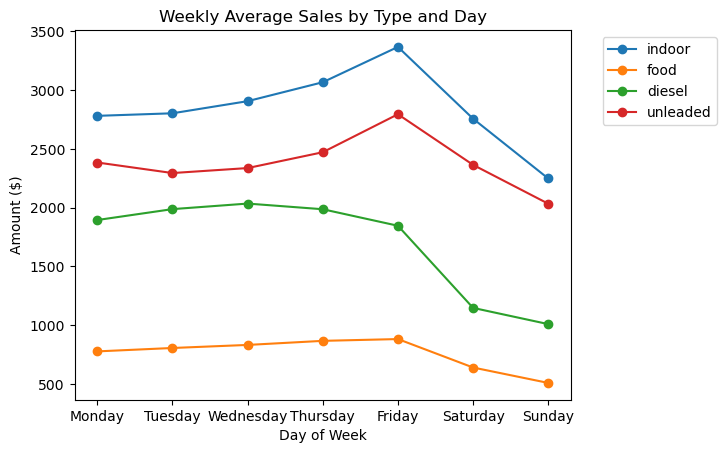

In [ ]:
## Weekly Seasonality Plot
x = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
indoor = average_weekly_sales_indoor1.iloc[:,1]
food = average_weekly_sales_food1.iloc[:,1]
diesel = average_weekly_sales_diesel1.iloc[:,1]
unleaded = average_weekly_sales_unleaded1.iloc[:,1]

plt.plot(x, indoor, label ='indoor', marker = 'o')
plt.plot(x, food, label ='food', marker = 'o')
plt.plot(x, diesel, label ='diesel', marker = 'o')
plt.plot(x, unleaded, label ='unleaded', marker = 'o')

plt.xlabel("Day of Week")
plt.ylabel("Amount ($)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Weekly Average Sales by Type and Day')
plt.show()

In the chart created by this code, the x-axis indicates the "Day of the Week" from Monday to Sunday, while the y-axis shows the "Amount ($)" representing the average sales. Each sales category, such as indoor, food, diesel, and unleaded, is represented by a separate line in the chart, with data points marked as dots ('o').
This visual representation helps us easily see how much of each category the company sells on different days of the week.

It provides insights into sales patterns, showing which products perform better on specific days, and is a valuable tool for understanding weekly sales trends.
Interestingly diesel peaks on Wednesday but the rest of the categories peak on Friday.
Similarly we can  see during the week, diesel and unleaded almost mirror eachother.

<h2><a name = "annual_visuals"> 5a. Annual Visuals</a></h2>

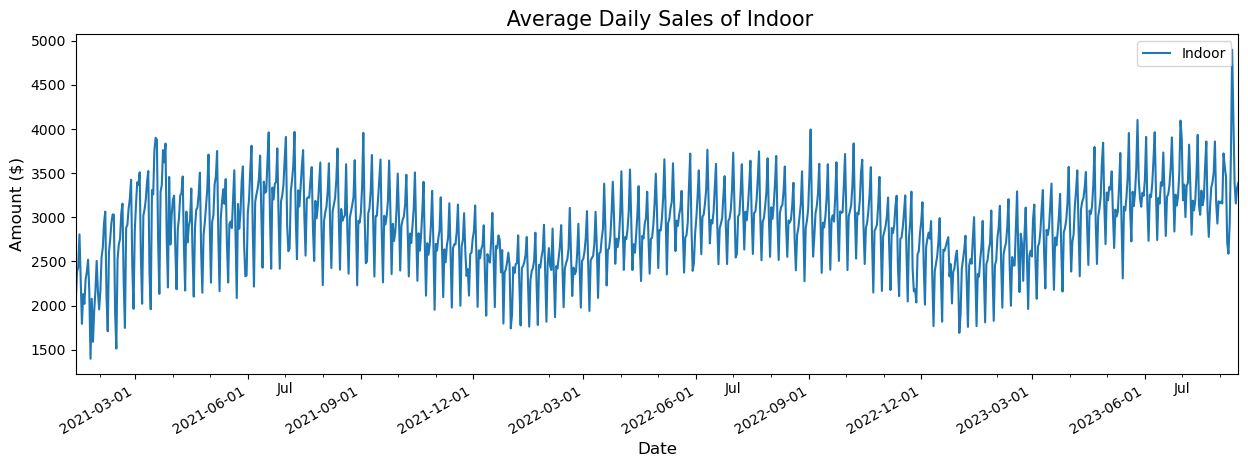

In [ ]:
## Indoor Sales Plot
ax = average_daily_sales_indoor1.plot(figsize=(15, 5))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.title(" Average Daily Sales of Indoor", fontsize=15)
plt.legend().get_texts()[0].set_text('Indoor')
plt.show()

The plot provides insights into the daily sales trends of indoor products, with the x-axis date labels automatically formatted for clarity.
The title "Average Daily Sales of Indoor" and the y-axis label "Amount ($)" add context to the plot.
Additionally, the legend identifies the product category as "Indoor."

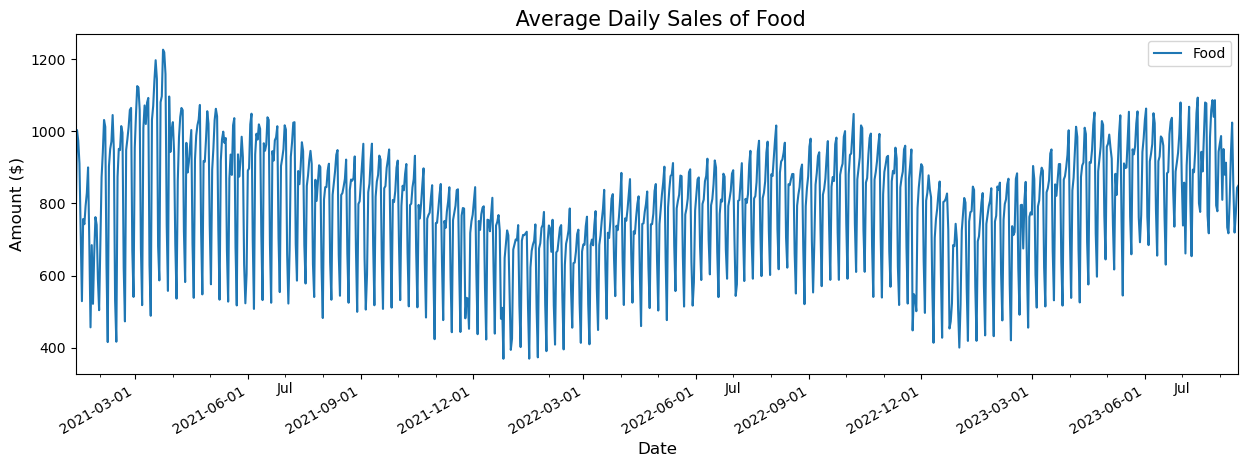

In [ ]:
## Food Sales Plot
ax = average_daily_sales_food1.plot(figsize=(15, 5))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.title(" Average Daily Sales of Food", fontsize=15)
plt.legend().get_texts()[0].set_text('Food')
plt.show()

The x-axis displays dates in the 'Year-Month-Day' format, major tick marks are set at three-month intervals, and the figure size is 15 units wide and 5 units high. and the y-axis represents sales amounts in dollars.
The title of the plot is "Average Daily Sales of Food," and the legend entry is labeled as "Food." This visualization provides a clear and concise representation of the daily sales patterns for food products, facilitating the observation of trends and fluctuations over the specified time period.

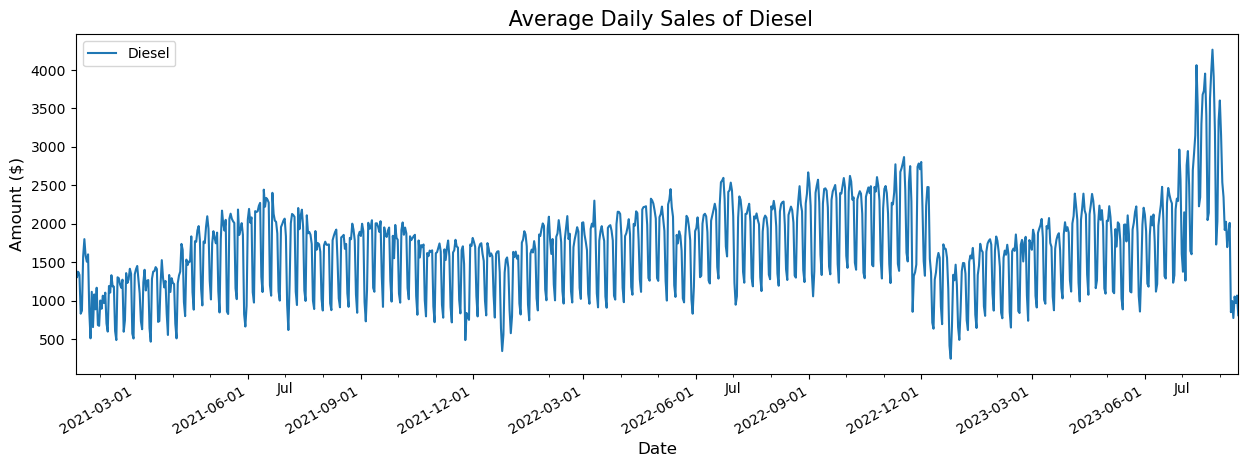

In [ ]:
## Diesel Sales Plot
ax = average_daily_sales_diesel1.plot(figsize=(15, 5))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.title(" Average Daily Sales of Diesel", fontsize=15)
plt.legend().get_texts()[0].set_text('Diesel')
plt.show()

The x-axis displays dates in the 'Year-Month-Day' format, with significant tick marks appearing every three months to provide a clear time reference. Sales figures, expressed in dollars, are represented on the y-axis, emphasizing the financial aspect of the data.
This visualization offers a straightforward way to visualize and understand the daily sales trends for diesel fuel during the chosen time frame, allowing for the observation of changes and fluctuations in sales.

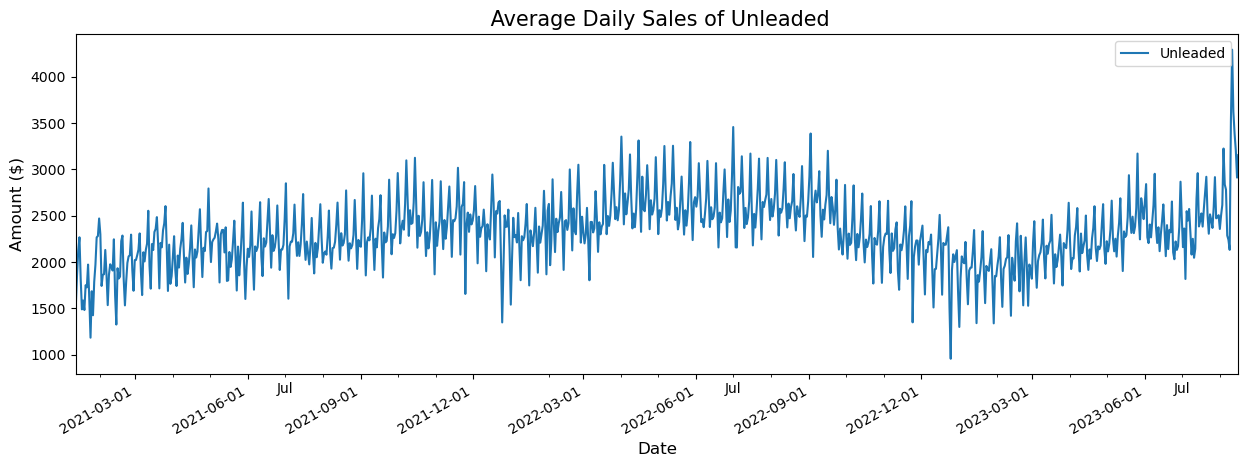

In [ ]:
## Unleaded Sales Plot
#Diesel sales all time averaged plot
ax = average_daily_sales_unleaded1.plot(figsize=(15, 5))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.title(" Average Daily Sales of Unleaded", fontsize=15)
plt.legend().get_texts()[0].set_text('Unleaded')
plt.show()

The x-axis of this chart presents dates in the 'Year-Month-Day' format, and it conveniently marks significant points in time every three months for easy tracking.
On the y-axis, the chart represents sales figures in dollars, making it evident that we're dealing with financial data.
This visualization provides a straightforward and efficient means to grasp the daily sales patterns of unleaded fuel over the chosen time frame, enabling the observation of any variations and fluctuations in sales over time.

<h2><a name = "weekday_visuals"> 5b. Weekday Visuals - Exploring 3-day weekend sales</a></h2>

In [ ]:
#Modify the original time_data to include a column to show if it is a three day weekend holiday or not.
time_data_3day = time_data
time_data_3day.reset_index()
def three_day(calendar_information,calendar):
        if calendar_information in ["Memorial Day", "Martin Luther King Day", "Labor Day","President's Day","Good Friday", "Columbus Day"]:
            return 1
        elif (calendar_information in ["New Year's Day","Juneteenth","Independence Day","Veteran's Day","Christmas Day"]) & (calendar in ["Monday","Friday"]):
            return 1
        elif calendar_information in ["Thanksgiving Day"]:
            return 1
        else:
            return 0
time_data_3day['long_weekend'] = time_data_3day.apply(lambda row: three_day(row['calendar_information.holiday'], row['calendar.day_of_week']), axis=1)


In [ ]:
#Make the data column a datetime
time_data_3day[["capital_projects.soft_opening_date","calendar.calendar_day_date"]] = time_data_3day[["capital_projects.soft_opening_date","calendar.calendar_day_date"]].apply(pd.to_datetime)

In [ ]:
#Make sure that the dates are in order
time_data_3day = time_data_3day.sort_values(by = ['site_id_msba', 'calendar.calendar_day_date'], ascending = [True, True])

In [ ]:
#Modify further to show a three day for every day that is in that three day

def three_day_satsun2(x):
    for row in range(len(x)):
        if x['long_weekend'][row] == 1: #Keep the same
            x['long_weekend'][row] = 1
        elif x['calendar.day_of_week'][row] == 'Saturday': #For Saturday
            if (x['long_weekend'].shift(1)[row] == 1) & (((x['calendar.calendar_day_date'][row] - x['calendar.calendar_day_date'].shift(1)[row]).days == 1) | ((x['calendar.calendar_day_date'][row] - x['calendar.calendar_day_date'].shift(1)[row]).days == 2)):
                x['long_weekend'][row] = 1 #Adjusting for a Friday
            elif (x['long_weekend'].shift(2)[row] == 1) & ((x['calendar.calendar_day_date'][row] - x['calendar.calendar_day_date'].shift(2)[row]).days == 2):
                x['long_weekend'][row] = 1 #Adjusting for Thanksgiving
            elif (x['long_weekend'].shift(-2)[row] == 1) & ((x['calendar.calendar_day_date'][row] - x['calendar.calendar_day_date'].shift(-2)[row]).days == -2):
                x['long_weekend'][row] = 1 #Adjusting for Monday
            elif (x['long_weekend'].shift(-1)[row] == 1) & (((x['calendar.calendar_day_date'][row] - x['calendar.calendar_day_date'].shift(-1)[row]).days == -2) | ((x['calendar.calendar_day_date'][row] - x['calendar.calendar_day_date'].shift(-1)[row]).days == -1)):
                x['long_weekend'][row] = 1 #Adjusting for Sunday
            else: x['long_weekend'][row] = 0
        elif x['calendar.day_of_week'][row] == 'Sunday': #For Sunday
            if (x['long_weekend'].shift(1)[row] == 1) & (((x['calendar.calendar_day_date'][row] - x['calendar.calendar_day_date'].shift(1)[row]).days == 1) | ((x['calendar.calendar_day_date'][row] - x['calendar.calendar_day_date'].shift(1)[row]).days == 2) | ((x['calendar.calendar_day_date'][row] - x['calendar.calendar_day_date'].shift(1)[row]).days == 3)):
                x['long_weekend'][row] = 1 #Adjusting for a Saturday
            elif (x['long_weekend'].shift(2)[row] == 1) & (x['long_weekend'].shift(1)[row] == 1) & (((x['calendar.calendar_day_date'][row] - x['calendar.calendar_day_date'].shift(2)[row]).days == 2) | ((x['calendar.calendar_day_date'][row] - x['calendar.calendar_day_date'].shift(1)[row]).days == 3)):
                x['long_weekend'][row] = 1 #Adjusting for a Friday
            elif (x['long_weekend'].shift(3)[row] == 1) & ((x['calendar.calendar_day_date'][row] - x['calendar.calendar_day_date'].shift(3)[row]).days == 3):
                x['long_weekend'][row] = 1 #Adjusting for a Thanksgiving
            elif (x['long_weekend'].shift(-1)[row] == 1) & ((x['calendar.calendar_day_date'][row] - x['calendar.calendar_day_date'].shift(-1)[row]).days == -1):
                x['long_weekend'][row] = 1 #Adjusting for a Monday
            else: x['long_weekend'][row] = 0
        elif x['calendar.day_of_week'][row] == 'Friday': #For Friday
            if (x['long_weekend'].shift(1)[row] == 1) & ((x['calendar.calendar_day_date'][row] - x['calendar.calendar_day_date'].shift(1)[row]).days == 1):
                x['long_weekend'][row] = 1 #Adjusting for a Thanksgiving
            else: x['long_weekend'][row] = 0
        else: x['long_weekend'][row] = 0

In [ ]:
three_day_satsun2(time_data_3day)

In [ ]:
#Modify further to show a preceding Thursday or Friday as a day before the long weekend
time_data_3day['pre_long_weekend'] = None
def before_threeday_tf(x):
    for row in range(len(x)):
        if x['calendar.day_of_week'][row] == 'Thursday': #For Thursday
            if (x['long_weekend'].shift(-1)[row] == 1) & (((x['calendar.calendar_day_date'][row] - x['calendar.calendar_day_date'].shift(-1)[row]).days == -4) | ((x['calendar.calendar_day_date'][row] - x['calendar.calendar_day_date'].shift(-1)[row]).days == -1)):
                x['pre_long_weekend'][row] = 1 #Adjusting for Monday and Friday in case others are missing in between.
            else: x['pre_long_weekend'][row] = 0
        elif x['calendar.day_of_week'][row] == 'Friday': #For Friday
            if (x['long_weekend'].shift(-1)[row] == 1) & (x['pre_long_weekend'].shift(1)[row] != 1) & (((x['calendar.calendar_day_date'][row] - x['calendar.calendar_day_date'].shift(-1)[row]).days == -3) | ((x['calendar.calendar_day_date'][row] - x['calendar.calendar_day_date'].shift(-1)[row]).days == -1)):
                x['pre_long_weekend'][row] = 1 #Adjusting for Monday and Saturday in case others are missing in between.
            else: x['pre_long_weekend'][row] = 0
        else: x['pre_long_weekend'][row] = 0

In [ ]:
before_threeday_tf(time_data_3day)

In [ ]:
#Create data needed for indoor
nonthree_indoor = time_data_3day[(time_data_3day['long_weekend'] == 0) & ((time_data_3day['calendar.day_of_week'] == 'Saturday') | (time_data_3day['calendar.day_of_week'] == 'Sunday') | (time_data_3day['calendar.day_of_week'] == 'Monday') | (time_data_3day['calendar.day_of_week'] == 'Friday'))].groupby('calendar.day_of_week')["daily_yoy_ndt.total_inside_sales"].mean().reset_index()
three_indoor = time_data_3day[(time_data_3day['long_weekend'] == 1) & ((time_data_3day['calendar.day_of_week'] == 'Saturday') | (time_data_3day['calendar.day_of_week'] == 'Sunday') | (time_data_3day['calendar.day_of_week'] == 'Monday') | (time_data_3day['calendar.day_of_week'] == 'Friday'))].groupby('calendar.day_of_week')["daily_yoy_ndt.total_inside_sales"].mean().reset_index()
pre_nonthree_indoor = time_data_3day[(time_data_3day['pre_long_weekend'] == 0) & ((time_data_3day['calendar.day_of_week'] == 'Thursday') | (time_data_3day['calendar.day_of_week'] == 'Friday'))].groupby('calendar.day_of_week')["daily_yoy_ndt.total_inside_sales"].mean().reset_index()
pre_three_indoor = time_data_3day[(time_data_3day['pre_long_weekend'] == 1) & ((time_data_3day['calendar.day_of_week'] == 'Thursday') | (time_data_3day['calendar.day_of_week'] == 'Friday'))].groupby('calendar.day_of_week')["daily_yoy_ndt.total_inside_sales"].mean().reset_index()


In [ ]:
#Create data needed for food
nonthree_food = time_data_3day[(time_data_3day['long_weekend'] == 0) & ((time_data_3day['calendar.day_of_week'] == 'Saturday') | (time_data_3day['calendar.day_of_week'] == 'Sunday') | (time_data_3day['calendar.day_of_week'] == 'Monday') | (time_data_3day['calendar.day_of_week'] == 'Friday'))].groupby('calendar.day_of_week')["daily_yoy_ndt.total_food_service"].mean().reset_index()
three_food = time_data_3day[(time_data_3day['long_weekend'] == 1) & ((time_data_3day['calendar.day_of_week'] == 'Saturday') | (time_data_3day['calendar.day_of_week'] == 'Sunday') | (time_data_3day['calendar.day_of_week'] == 'Monday') | (time_data_3day['calendar.day_of_week'] == 'Friday'))].groupby('calendar.day_of_week')["daily_yoy_ndt.total_food_service"].mean().reset_index()
pre_nonthree_food = time_data_3day[(time_data_3day['pre_long_weekend'] == 0) & ((time_data_3day['calendar.day_of_week'] == 'Thursday') | (time_data_3day['calendar.day_of_week'] == 'Friday'))].groupby('calendar.day_of_week')["daily_yoy_ndt.total_food_service"].mean().reset_index()
pre_three_food = time_data_3day[(time_data_3day['pre_long_weekend'] == 1) & ((time_data_3day['calendar.day_of_week'] == 'Thursday') | (time_data_3day['calendar.day_of_week'] == 'Friday'))].groupby('calendar.day_of_week')["daily_yoy_ndt.total_food_service"].mean().reset_index()


In [ ]:
#Create data needed for diesel
nonthree_diesel = time_data_3day[(time_data_3day['long_weekend'] == 0) & ((time_data_3day['calendar.day_of_week'] == 'Saturday') | (time_data_3day['calendar.day_of_week'] == 'Sunday') | (time_data_3day['calendar.day_of_week'] == 'Monday') | (time_data_3day['calendar.day_of_week'] == 'Friday'))].groupby('calendar.day_of_week')["diesel"].mean().reset_index()
three_diesel = time_data_3day[(time_data_3day['long_weekend'] == 1) & ((time_data_3day['calendar.day_of_week'] == 'Saturday') | (time_data_3day['calendar.day_of_week'] == 'Sunday') | (time_data_3day['calendar.day_of_week'] == 'Monday') | (time_data_3day['calendar.day_of_week'] == 'Friday'))].groupby('calendar.day_of_week')["diesel"].mean().reset_index()
pre_nonthree_diesel = time_data_3day[(time_data_3day['pre_long_weekend'] == 0) & ((time_data_3day['calendar.day_of_week'] == 'Thursday') | (time_data_3day['calendar.day_of_week'] == 'Friday'))].groupby('calendar.day_of_week')["diesel"].mean().reset_index()
pre_three_diesel = time_data_3day[(time_data_3day['pre_long_weekend'] == 1) & ((time_data_3day['calendar.day_of_week'] == 'Thursday') | (time_data_3day['calendar.day_of_week'] == 'Friday'))].groupby('calendar.day_of_week')["diesel"].mean().reset_index()


In [ ]:
#Create data needed for unleaded
nonthree_unleaded = time_data_3day[(time_data_3day['long_weekend'] == 0) & ((time_data_3day['calendar.day_of_week'] == 'Saturday') | (time_data_3day['calendar.day_of_week'] == 'Sunday') | (time_data_3day['calendar.day_of_week'] == 'Monday') | (time_data_3day['calendar.day_of_week'] == 'Friday'))].groupby('calendar.day_of_week')["unleaded"].mean().reset_index()
three_unleaded = time_data_3day[(time_data_3day['long_weekend'] == 1) & ((time_data_3day['calendar.day_of_week'] == 'Saturday') | (time_data_3day['calendar.day_of_week'] == 'Sunday') | (time_data_3day['calendar.day_of_week'] == 'Monday') | (time_data_3day['calendar.day_of_week'] == 'Friday'))].groupby('calendar.day_of_week')["unleaded"].mean().reset_index()
pre_nonthree_unleaded = time_data_3day[(time_data_3day['pre_long_weekend'] == 0) & ((time_data_3day['calendar.day_of_week'] == 'Thursday') | (time_data_3day['calendar.day_of_week'] == 'Friday'))].groupby('calendar.day_of_week')["unleaded"].mean().reset_index()
pre_three_unleaded = time_data_3day[(time_data_3day['pre_long_weekend'] == 1) & ((time_data_3day['calendar.day_of_week'] == 'Thursday') | (time_data_3day['calendar.day_of_week'] == 'Friday'))].groupby('calendar.day_of_week')["unleaded"].mean().reset_index()


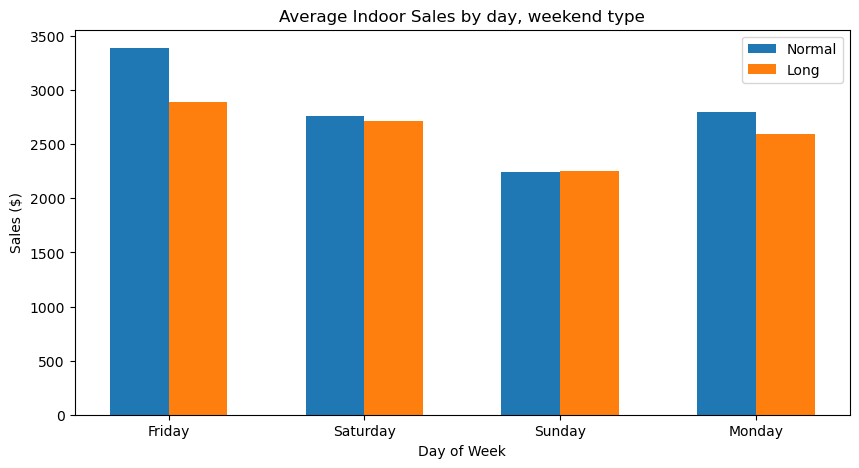

In [ ]:
#%% Indoor Long Weekend Comp
#Side by side template
#Number of bars
N = 4

# Data on X-axis
# Normal
normal = (nonthree_indoor.loc[0][1],nonthree_indoor.loc[2][1],nonthree_indoor.loc[3][1],nonthree_indoor.loc[1][1])
# Long
long = (three_indoor.loc[0][1],three_indoor.loc[2][1],three_indoor.loc[3][1],three_indoor.loc[1][1])

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar
width = 0.3

# Plotting
plt.bar(ind, normal , width, label='Normal')
plt.bar(ind + width, long, width, label='Long')

plt.xlabel('Day of Week')
plt.ylabel('Sales ($)')
plt.title('Average Indoor Sales by day, weekend type')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Friday','Saturday','Sunday', 'Monday'))

# Finding the best position for legends and putting it
plt.legend(loc='best')

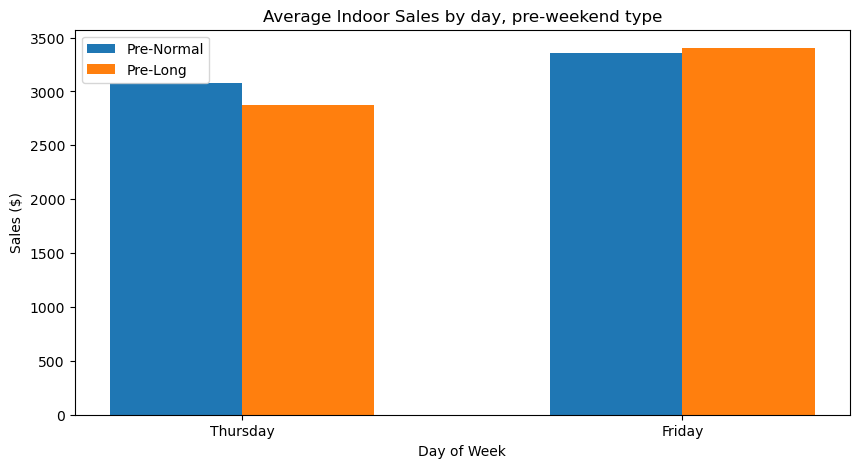

In [ ]:

#%% Indoor Pre LW Comp
#Side by side template
#Number of bars
N = 2

# Data on X-axis
# Normal
normal = (pre_nonthree_indoor.loc[1][1],pre_nonthree_indoor.loc[0][1])
# Long
long = (pre_three_indoor.loc[1][1],pre_three_indoor.loc[0][1])

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar
width = 0.3

# Plotting
plt.bar(ind, normal , width, label='Pre-Normal')
plt.bar(ind + width, long, width, label='Pre-Long')

plt.xlabel('Day of Week')
plt.ylabel('Sales ($)')
plt.title('Average Indoor Sales by day, pre-weekend type')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Thursday','Friday'))

# Finding the best position for legends and putting it
plt.legend(loc='best')

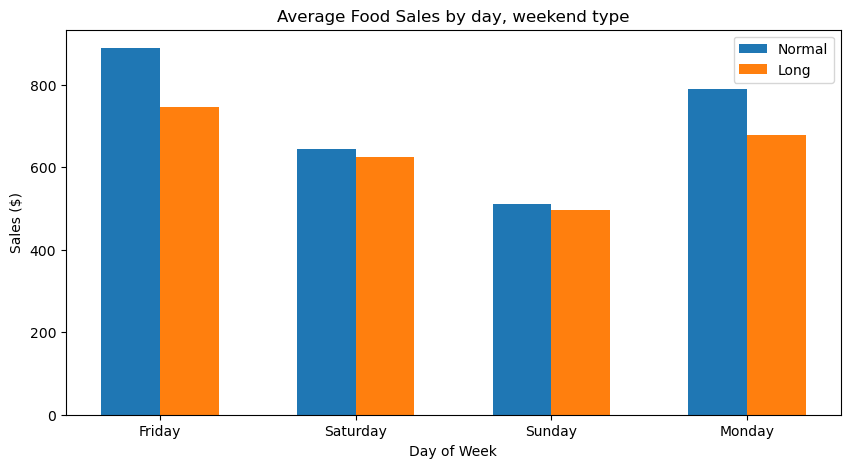

In [ ]:

#%% Food Long Weekend Comp
#Side by side template
#Number of bars
N = 4

# Data on X-axis
# Normal
normal = (nonthree_food.loc[0][1],nonthree_food.loc[2][1],nonthree_food.loc[3][1],nonthree_food.loc[1][1])
# Long
long = (three_food.loc[0][1],three_food.loc[2][1],three_food.loc[3][1],three_food.loc[1][1])

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar
width = 0.3

# Plotting
plt.bar(ind, normal , width, label='Normal')
plt.bar(ind + width, long, width, label='Long')

plt.xlabel('Day of Week')
plt.ylabel('Sales ($)')
plt.title('Average Food Sales by day, weekend type')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Friday','Saturday','Sunday', 'Monday'))

# Finding the best position for legends and putting it
plt.legend(loc='best')

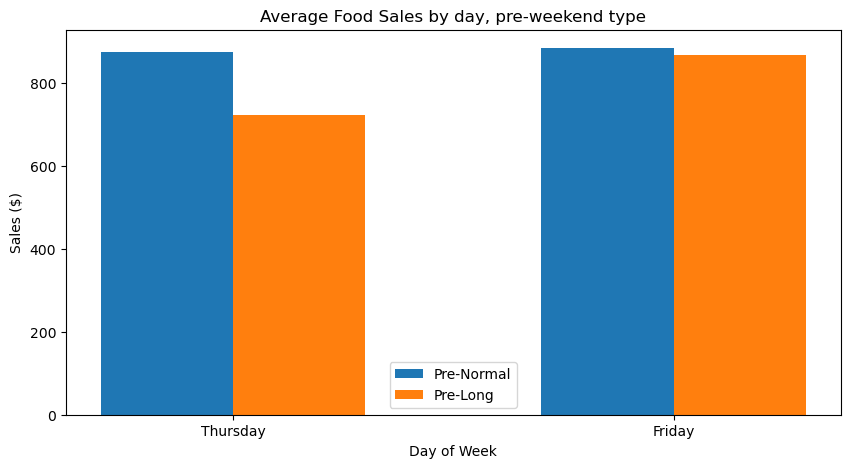

In [ ]:

#%% Food Pre LW Comp
#Side by side template
#Number of bars
N = 2

# Data on X-axis
# Normal
normal = (pre_nonthree_food.loc[1][1],pre_nonthree_food.loc[0][1])
# Long
long = (pre_three_food.loc[1][1],pre_three_food.loc[0][1])

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar
width = 0.3

# Plotting
plt.bar(ind, normal , width, label='Pre-Normal')
plt.bar(ind + width, long, width, label='Pre-Long')

plt.xlabel('Day of Week')
plt.ylabel('Sales ($)')
plt.title('Average Food Sales by day, pre-weekend type')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Thursday','Friday'))

# Finding the best position for legends and putting it
plt.legend(loc='best')



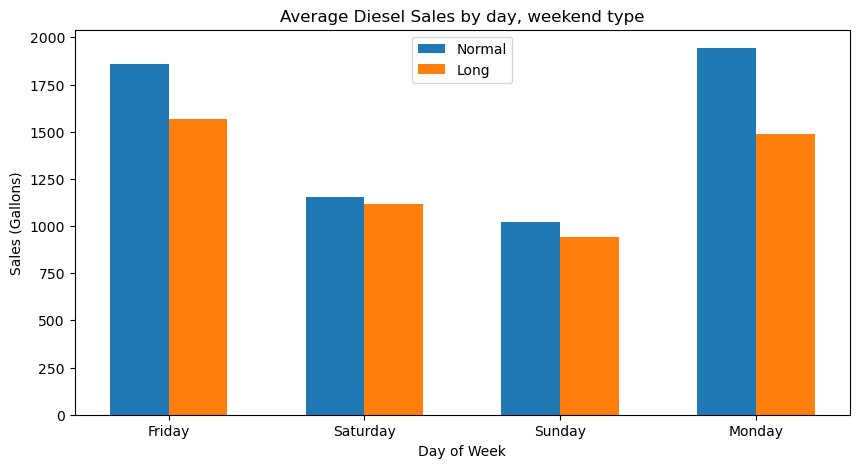

In [ ]:
#%% Diesel Long Weekend Comp
#Side by side template
#Number of bars
N = 4

# Data on X-axis
# Normal
normal = (nonthree_diesel.loc[0][1],nonthree_diesel.loc[2][1],nonthree_diesel.loc[3][1],nonthree_diesel.loc[1][1])
# Long
long = (three_diesel.loc[0][1],three_diesel.loc[2][1],three_diesel.loc[3][1],three_diesel.loc[1][1])

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar
width = 0.3

# Plotting
plt.bar(ind, normal , width, label='Normal')
plt.bar(ind + width, long, width, label='Long')

plt.xlabel('Day of Week')
plt.ylabel('Sales (Gallons)')
plt.title('Average Diesel Sales by day, weekend type')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Friday','Saturday','Sunday', 'Monday'))

# Finding the best position for legends and putting it
plt.legend(loc='best')

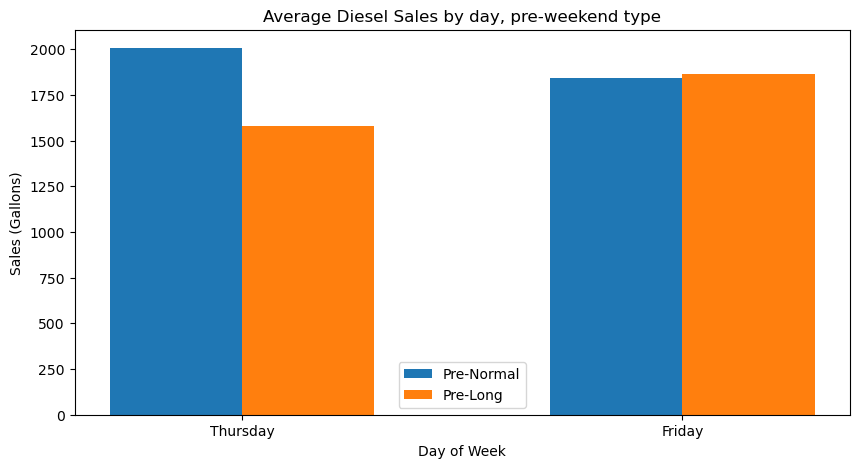

In [ ]:
#%% Diesel Pre LW Comp
#Side by side template
#Number of bars
N = 2

# Data on X-axis
# Normal
normal = (pre_nonthree_diesel.loc[1][1],pre_nonthree_diesel.loc[0][1])
# Long
long = (pre_three_diesel.loc[1][1],pre_three_diesel.loc[0][1])

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar
width = 0.3

# Plotting
plt.bar(ind, normal , width, label='Pre-Normal')
plt.bar(ind + width, long, width, label='Pre-Long')

plt.xlabel('Day of Week')
plt.ylabel('Sales (Gallons)')
plt.title('Average Diesel Sales by day, pre-weekend type')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Thursday','Friday'))

# Finding the best position for legends and putting it
plt.legend(loc='best')


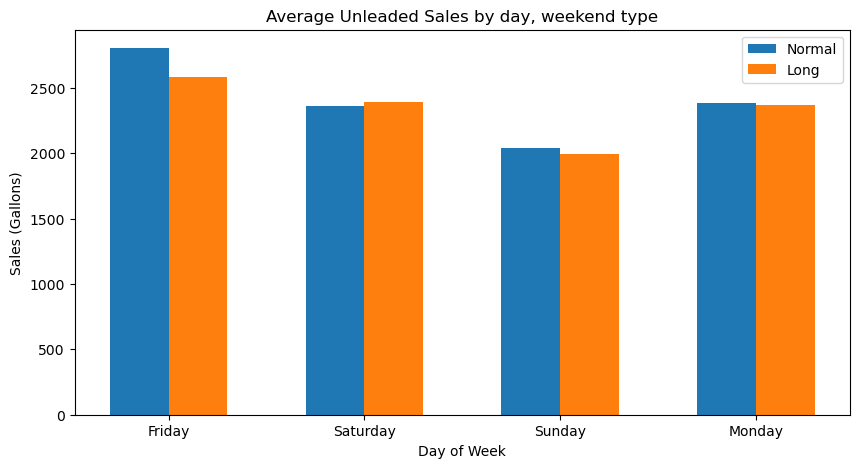

In [ ]:
#%% Interpretation Diesel
#Similar Results to Indoor. Big jump on Friday.

#%% Unleaded Long Weekend Comp
#Side by side template
#Number of bars
N = 4

# Data on X-axis
# Normal
normal = (nonthree_unleaded.loc[0][1],nonthree_unleaded.loc[2][1],nonthree_unleaded.loc[3][1],nonthree_unleaded.loc[1][1])
# Long
long = (three_unleaded.loc[0][1],three_unleaded.loc[2][1],three_unleaded.loc[3][1],three_unleaded.loc[1][1])

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar
width = 0.3

# Plotting
plt.bar(ind, normal , width, label='Normal')
plt.bar(ind + width, long, width, label='Long')

plt.xlabel('Day of Week')
plt.ylabel('Sales (Gallons)')
plt.title('Average Unleaded Sales by day, weekend type')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Friday','Saturday','Sunday', 'Monday'))

# Finding the best position for legends and putting it
plt.legend(loc='best')

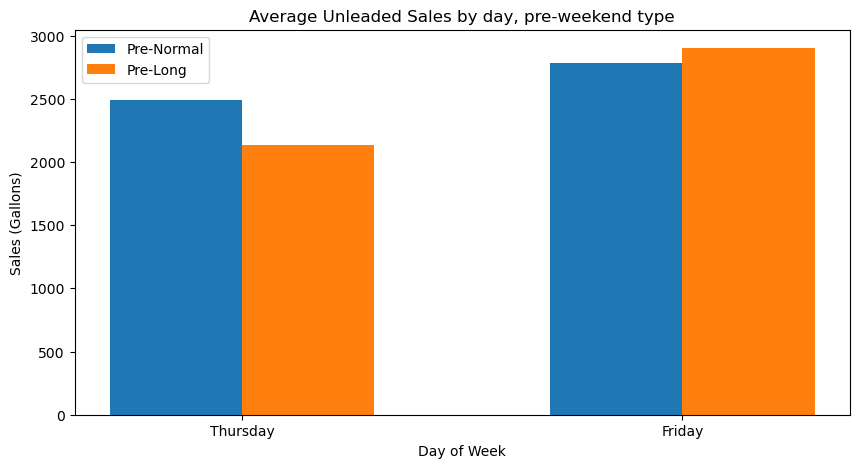

In [ ]:

#%% Unleaded Pre LW Comp
#Side by side template
#Number of bars
N = 2

# Data on X-axis
# Normal
normal = (pre_nonthree_unleaded.loc[1][1],pre_nonthree_unleaded.loc[0][1])
# Long
long = (pre_three_unleaded.loc[1][1],pre_three_unleaded.loc[0][1])

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar
width = 0.3

# Plotting
plt.bar(ind, normal , width, label='Pre-Normal')
plt.bar(ind + width, long, width, label='Pre-Long')

plt.xlabel('Day of Week')
plt.ylabel('Sales (Gallons)')
plt.title('Average Unleaded Sales by day, pre-weekend type')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Thursday','Friday'))

# Finding the best position for legends and putting it
plt.legend(loc='best')

<h2><a name = "results">6. Results</a></h2>

### Findings
- The time series analysis of daily sales revealed distinct trends and patterns in different product categories, such as food service, diesel, and unleaded fuel. Notably, diesel sales peaked on Wednesdays, while other categories had their peaks on Fridays. This information could be invaluable for inventory management and marketing strategies, ensuring that Maverik can meet customer demands effectively.

- The qualitative dataset provided valuable information about store attributes and services. Details about store sizes, parking capacities, and the availability of amenities like car wash and electric vehicle charging were included. This data can inform decisions regarding store locations and offerings, helping Maverik tailor its services to meet customer preferences and market demands.

- The handling of missing data through mode-based imputation ensures that the dataset remains comprehensive and reliable for analysis. This approach helps maintain data integrity and enables more accurate forecasting and decision-making.

- The project's findings provide Maverik with a solid foundation for creating a forecasting model that can enhance store selection, optimize inventory management, and improve overall business operations. These insights, coupled with the proposed solutions, position Maverik for more informed and data-driven decision-making, ultimately contributing to its growth and success in the competitive gas station and convenience store industry.

### Summary
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The project conducted by "Top Gun: Maverik" for Maverik, a subsidiary of FJ Management, involves the development of a forecasting model to enhance the selection and performance of new stores while maintaining existing locations. The model aims to provide daily revenue projections and item-specific sales forecasts, such as gasoline, diesel, in-store merchandise, and food. Leveraging a time series dataset, the team analyzed daily sales encompassing various categories, including food service, diesel fuel, and unleaded fuel, uncovering critical trends and patterns. Additionally, a qualitative dataset provided insights into store attributes, services, and location details. To address missing data, a solution involving mode-based imputation was proposed. Visualization techniques were employed to highlight daily and weekly sales trends, aiding in product performance analysis.

<h2><a name = "appendix">7. Appendix</a></h2>

Group Member Contribution
    Dayton Murset: Visualizations
    Dominique Miranda: Missing Data
    Jenisha Rawal: Interpretation Writing & Results
    Andrew Moore: Notebook aggregation & professional use